In [1]:
import pandas as pd
import numpy as np

In [2]:
path="result_walk/usable/15_snn_selu_quan_3actor_bst procd/"
fold="params/spike-sac_sac-popsan-Walker2d-v2-encoder-dim-10-decoder-dim-10/"
data=pd.read_csv(path+fold+"data0_traincsv.csv",low_memory=False)

In [3]:
data.head()

,t,a,o2,r,d,_
0,-1,NaN,[ 1.25237979e+00 -3.91980953e-03 -1.47644739e-...,NaN,NaN,NaN
1,0,[-0.32570738 0.47595713 -0.7839619 -0.295289...,[ 1.25266315e+00 -1.55444833e-02 -2.10477379e-...,0.816956,False,{}
2,1,[ 0.4966405 0.74317646 -0.6943434 -0.206952...,[ 1.2538864 -0.03192145 -0.04114511 0.02...,0.703054,False,{}
3,2,[ 0.77044785 -0.7157062 -0.9909842 -0.097971...,[ 1.25634389e+00 -2.68312680e-02 -2.30391205e-...,0.932689,False,{}
4,3,[-0.74638075 -0.6313731 -0.68048894 0.020640...,[ 1.26026898 -0.01341385 0.01734838 -0.02...,0.707778,False,{}


In [4]:
with open(path+"terminal",'r')as f:
    alll=f.read()
t=alll.split("Model")
agent=[]
for tem in t:
    if "Steps" in tem:
        k=tem.split("Selected aCtro")[1].split("\n")[0].strip()
        agent.append(k)


In [5]:
label=[1]  #t=-1
#label.extend([-1]*(len(data)-1))#t=0 & onward
#label.extend(["1"]*10000) #starting 10k actor1 (t+1)
k=0
time=data["t"]
#print(time[:50])
#print(len(time))
for i in time[1:]: #time-1 already covered
    if (i+1)<10000:
        label.extend(["1"])
    else:
        label.extend(agent[((i+1)//10000)-1])

In [6]:
len(label)

1002216

In [7]:
data["agent"]=label

In [8]:
k=data.loc[data["t"]==110000-1]
print("t+1",k["t"]+1,"agent",k["agent"])

t+1 111211    110000
Name: t, dtype: int64 agent 111211    1
Name: agent, dtype: object


In [9]:
drop_nn_data=data.dropna()

In [10]:
len(drop_nn_data)

1000000

for i in range(1001):
    if data.iloc[1000000+i]["d"]==True:
        print(100000+i)

In [11]:
state=[i[1:-1].split() for i in drop_nn_data["o2"]]
np.shape(state)

(1000000, 17)

In [12]:
row=np.shape(state)[0]
clmn=np.shape(state)[1]
row,clmn

(1000000, 17)

In [13]:
obs=[[float(state[k][col]) for col in range(clmn)] for k in range(row)]

In [14]:
np.shape(obs)

(1000000, 17)

In [15]:
from sklearn.manifold import TSNE

In [47]:
X_embedded = TSNE(random_state=100).fit_transform(obs[:30000])

In [48]:
len(X_embedded)

30000

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print(num_classes)
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    print(np.shape(x),x[:,1])
    sc = ax.scatter(x[:,0], x[:,1])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

2
(30000, 2) [ 13.1218405  17.64081    52.557327  ... -28.95892   -28.511366
 -26.245718 ]


/home/admin12/.conda/envs/pc_snn/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/admin12/.conda/envs/pc_snn/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(nan, nan, '0'), Text(nan, nan, '1')])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


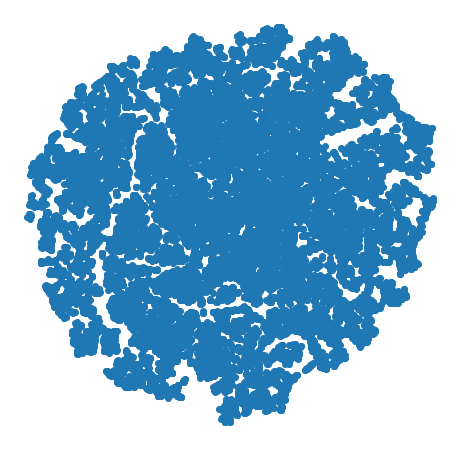

In [51]:
import matplotlib.patheffects as PathEffects
y=drop_nn_data["agent"][:30000]
#print(y)
fashion_scatter(X_embedded, y)

[[ 25.653337  20.30541 ]
 [ 41.157387  58.65093 ]
 [ 79.59687   10.709337]
 ...
 [ 19.19758  -36.898407]
 [ 27.932217 -24.246468]
 [ 31.610464 -23.419512]]
[[ 25.653337  20.30541 ]
 [ 41.157387  58.65093 ]
 [ 79.59687   10.709337]
 ...
 [ 19.19758  -36.898407]
 [ 27.932217 -24.246468]
 [ 31.610464 -23.419512]]
[[ 25.653337  20.30541 ]
 [ 41.157387  58.65093 ]
 [ 79.59687   10.709337]
 ...
 [ 19.19758  -36.898407]
 [ 27.932217 -24.246468]
 [ 31.610464 -23.419512]]


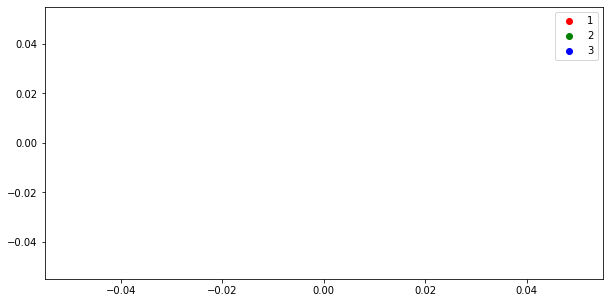

In [37]:
target_ids = range(3)#three agent oof actor
y=drop_nn_data["agent"][:10000]
target_names=["1","2","3"]
plt.figure(figsize=(10, 5))
colors = 'r', 'g', 'b'
for i, c, label in zip(target_ids, colors, target_names):
    #print(X_embedded)
    plt.scatter(X_embedded[y == i, 0], X_embedded[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne

x_data = np.asarray(obs[:10000]).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

#x_data=obs[:10000]
y_data=drop_nn_data["agent"][:10000]
vis_data = bh_sne(np.array(x_data))

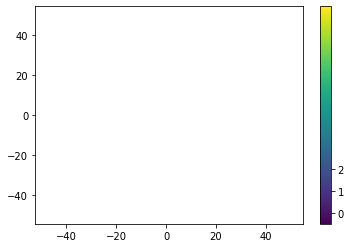

In [27]:
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(3))
plt.clim(-0.5, 9.5)
plt.show()

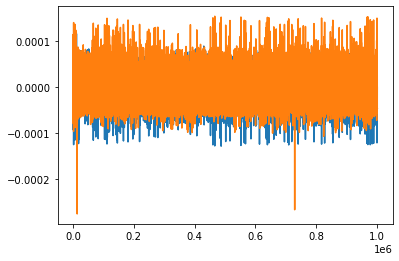

In [14]:
#plt.plot(X_embedded)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tsne import bh_sne
x_data = obs
y_data = labels
# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))
# For speed of computation, only run on a subset
n = 20000
x_data = x_data[:n]
y_data = y_data[:n]
# perform t-SNE embedding
vis_data = bh_sne(x_data)
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]
plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap("jet", 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [13]:
X_embedded50 = TSNE(n_components=2,perplexity=50).fit_transform(obs)

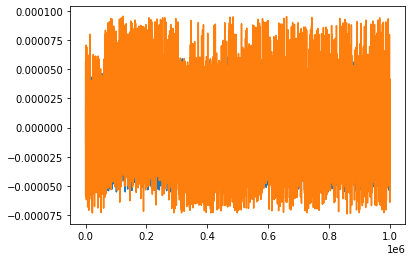

In [15]:
plt.plot(X_embedded50)

In [184]:
drop_act=data["a"].dropna()

In [185]:
len(drop_act)

1000000

In [1]:
action=[i[1:-1].split() for i in data["a"].dropna()]
action

NameError: name 'data' is not defined

In [ ]:
row=np.shape(action)[0]
clmn=np.shape(action)[1]
row,clmn

In [ ]:
act=[[float(action[k][col]) for col in range(clmn)] for k in range(row)]